In [1]:
import pandas as pd

filename = r'C:\\sqlite\\mysql\\code\\수업\\ml\\data\\owid-covid-data.csv'

df = pd.read_csv(filename)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [2]:
from prophet import Prophet

In [3]:
df.isnull().sum()

iso_code                                        0
continent                                   11178
location                                        0
date                                            0
total_cases                                  7551
                                            ...  
human_development_index                     37924
excess_mortality_cumulative_absolute       185748
excess_mortality_cumulative                185748
excess_mortality                           185748
excess_mortality_cumulative_per_million    185748
Length: 67, dtype: int64

In [4]:
df = df.fillna(0)

In [5]:
# df['date'] = pd.to_datetime(df['date'])

In [6]:
#필요한 열만 추출
df = df[['date', 'new_deaths']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        192301 non-null  object 
 1   new_deaths  192301 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.9+ MB


In [7]:
df.rename(columns={'date':'ds'}
                       , inplace=True)
# 중위값 열 추가
df['y'] = df['new_deaths']

df.head()

,ds,new_deaths,y
0,2020-02-24,0.0,0.0
1,2020-02-25,0.0,0.0
2,2020-02-26,0.0,0.0
3,2020-02-27,0.0,0.0
4,2020-02-28,0.0,0.0


In [8]:
# 프로핏 모델 객체 만들기
m = Prophet()
# 데이터프레임 학습
m.fit(df)

11:40:49 - cmdstanpy - INFO - Chain [1] start processing
11:41:12 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# 예측 데이터프레임 준비하기
future = m.make_future_dataframe(periods=1000)

# 끝부분 확인하기
future.tail()

,ds
1884,2025-02-27
1885,2025-02-28
1886,2025-03-01
1887,2025-03-02
1888,2025-03-03


In [10]:
# 예측하기
forecast = m.predict(future)
# 예측결과 끝부분 확인하기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1884,2025-02-27,-482.776022,-4186.315796,3224.398653
1885,2025-02-28,-488.901961,-4160.855528,3183.438122
1886,2025-03-01,-519.608105,-4146.445353,3237.026907
1887,2025-03-02,-550.187796,-4406.605585,3119.018336
1888,2025-03-03,-531.717611,-4333.768074,3157.085461


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


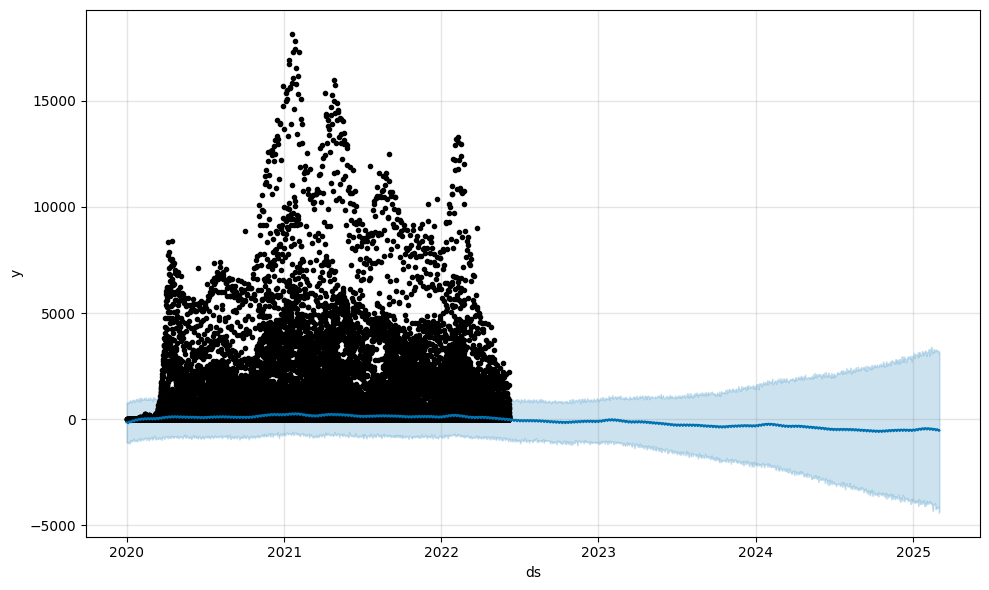

In [11]:
fig1 = m.plot(forecast)

In [12]:
# 2차 예측을 위한 프로핏 객체 만들기
m2 = Prophet()

# 2021년 1월 1일 이후 데이터만 준비
df2 = df[df['ds'] > '2021-01-01']

# 데이터 끝 부분 확인하기
df2.tail()

,ds,new_deaths,y
192296,2022-06-03,1.0,1.0
192297,2022-06-04,0.0,0.0
192298,2022-06-05,1.0,1.0
192299,2022-06-06,3.0,3.0
192300,2022-06-07,2.0,2.0


11:46:37 - cmdstanpy - INFO - Chain [1] start processing
11:46:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), 

          ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2021-01-02  258.604557 -724.881530  1235.526154   258.604557   258.604557   
1 2021-01-03  258.140031 -812.447856  1224.930965   258.140031   258.140031   
2 2021-01-04  257.675505 -750.380561  1251.036834   257.675505   257.675505   
3 2021-01-05  257.210979 -746.607488  1302.294304   257.210979   257.210979   
4 2021-01-06  256.746452 -751.487865  1247.572346   256.746452   256.746452   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      -17.970460            -17.970460            -17.970460 -17.970460   
1      -48.005212            -48.005212            -48.005212 -48.005212   
2      -19.827728            -19.827728            -19.827728 -19.827728   
3       20.590432             20.590432             20.590432  20.590432   
4       28.638290             28.638290             28.638290  28.638290   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    -17.9704

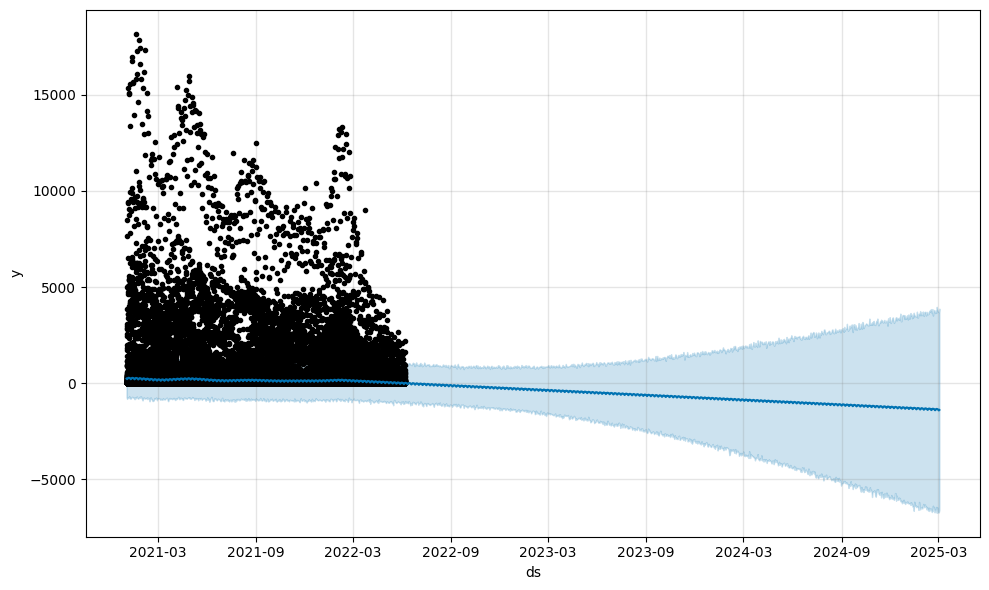

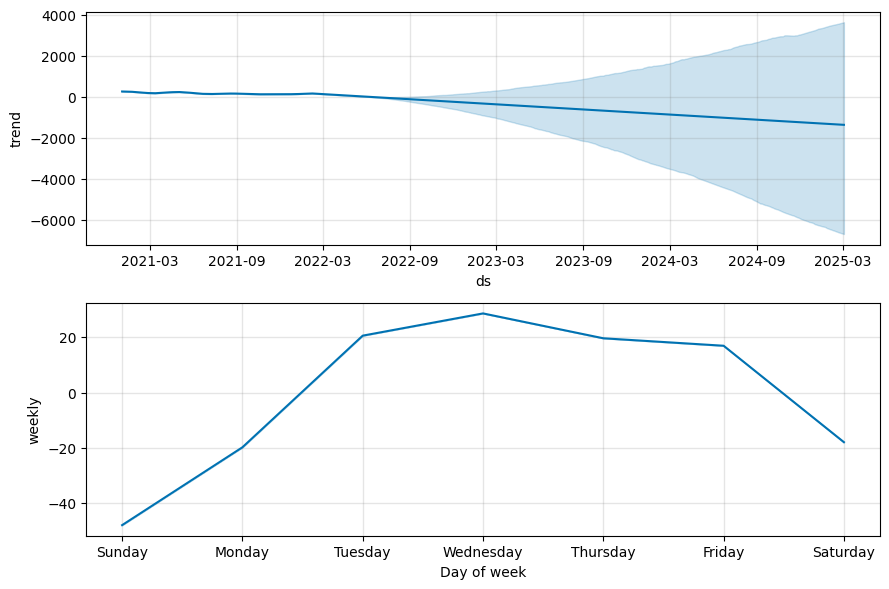

In [20]:
# 데이터 학습하기
m2.fit(df2)

# 예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods=1000)

# 예측하기
forecast2 = m2.predict(future2)

# 예측 결과 끝부분 확인하기
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 시각화하기
fig3 = m2.plot(forecast2)
# 2차 예측 컴포넌트 확인하기
fig4 = m2.plot_components(forecast2)

In [19]:
# import plotly.graph_objs as go
# plot 모듈 탑재
from prophet.plot import plot_plotly

# 대화형 예측 그래프 그리기
plot_plotly(m2, forecast2)

TypeError: 'NoneType' object is not subscriptable